In [40]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [41]:
'''datasetlink: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld'''

'datasetlink: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld'

In [42]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'PLD_3_Classes_256/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3252 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [43]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

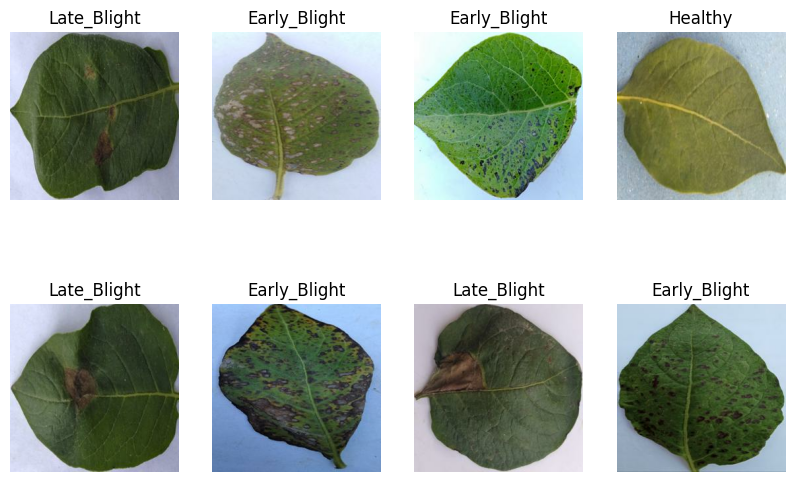

In [44]:
len(training_dataset)
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [45]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

resize_scale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [47]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [48]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [49]:
model.summary()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [50]:
model.fit(
    training_dataset,
    epochs=5, 
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/5
102/102 [==============================] - 137s 1s/step - loss: 0.9672 - accuracy: 0.5101 - val_loss: 0.8981 - val_accuracy: 0.5409
Epoch 2/5
102/102 [==============================] - 145s 1s/step - loss: 0.7377 - accuracy: 0.7011 - val_loss: 0.7971 - val_accuracy: 0.6394
Epoch 3/5
102/102 [==============================] - 140s 1s/step - loss: 0.5472 - accuracy: 0.7931 - val_loss: 0.4371 - val_accuracy: 0.8413
Epoch 4/5
102/102 [==============================] - 148s 1s/step - loss: 0.4046 - accuracy: 0.8423 - val_loss: 0.3516 - val_accuracy: 0.8678
Epoch 5/5
13/13 [==============================] - 4s 254ms/step - loss: 0.3071 - accuracy: 0.8988


[0.3071230947971344, 0.8987654447555542]

In [51]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')

13/13 [==============================] - 3s 233ms/step - loss: 0.3071 - accuracy: 0.8988
Test accuracy: 0.8987654447555542


In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


In [53]:
# Load the image
img_path = 'PLD_3_Classes_256/Testing/Healthy/Healthy_101.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# Convert image to array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Normalize and expand dimensions
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, 0)  # Convert to shape (1, 256, 256, 3)


In [54]:
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)


1/1 [==============================] - 0s 94ms/step


In [55]:
print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")


Predicted class: Healthy (Confidence: 0.97)


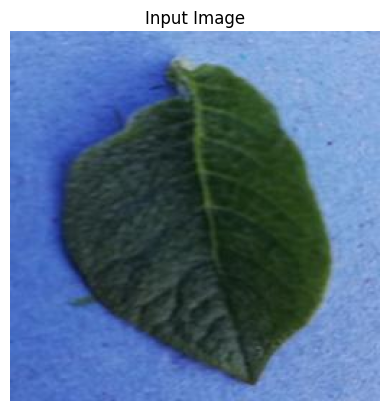

1/1 [==============================] - 0s 32ms/step
Predicted class: Healthy (Confidence: 0.97)


In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = 'PLD_3_Classes_256/Testing/Healthy/Healthy_101.jpg'  # Replace with actual path
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# Show the image (optional)
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Convert to array and preprocess
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 256, 256, 3)

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)

# Print the result
print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")
